<a href="https://colab.research.google.com/github/VallenDraa/statistika-elementer/blob/main/statistik_deskriptif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
""" 
Program ini akan menampilkan hasil perhitungan ukuran pemusatan, 
penyebaran dan distribusi data yang merupakan bagian dari statistik deskriptif.

Adapun data yang akan digunakan adalah data pengangguran di Provinsi DKI 
Jakarta pada tahun 2016. terdapat 8 kolom pada data yaitu:
  
  1. Tahun
  2. Nama Provinsi 
  3. Nama Kabupaten / Kota
  4. Nama Kecamatan
  5. Nama Kelurahan
  6. Usia
  7. Jenis Kelamin
  8. Jumlah Orang Yang Menganggur

Disini kelompok tiga hanya akan mengacu kepada jumlah pegangguran per 
kabupaten / kota sebagai lingkup datanya agar visualisasi serta perhitungan 
data lebih mudah untuk dilakukan.
"""

In [186]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kurtosis, skew

In [187]:
# membuat dataframe dari data pengangguran di DKI Jakarta per kabupaten tahun 2016 
df = pd.read_csv("/content/data-pengangguran-dki-2016.csv")
df_kabupaten = df.groupby("nama_kabupaten/kota").sum()[["jumlah"]].sort_values("jumlah")

# menyimpan banyak baris untuk digunakan pada perhitungan
banyak_baris = len(df_kabupaten)

# cetak tabel dari dataframe 
df_kabupaten

,jumlah
nama_kabupaten/kota,
KAB.ADM.KEP.SERIBU,495
JAKARTA SELATAN,6871
JAKARTA PUSAT,7186
JAKARTA BARAT,10747
JAKARTA UTARA,10991
JAKARTA TIMUR,18487


Text(0, 0.5, 'Jumlah Pengangguran')

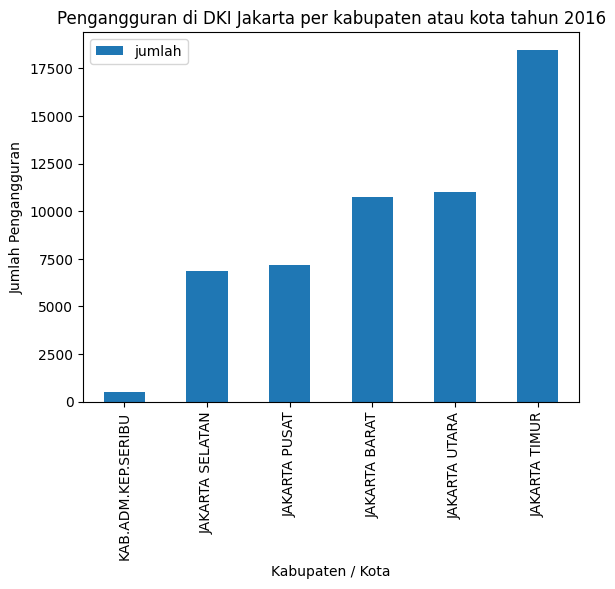

In [188]:
# visualisasi dataframe sebagai Bar Graph
bar_graph = df_kabupaten.plot(kind="bar")
bar_graph.set_title("Pengangguran di DKI Jakarta per kabupaten atau kota tahun 2016")
bar_graph.set_xlabel("Kabupaten / Kota")
bar_graph.set_ylabel("Jumlah Pengangguran")

In [189]:
# Menghitung pemusatan data

# menghitung rata-rata, median, modus
mean = df_kabupaten['jumlah'].mean()
median = df_kabupaten['jumlah'].median()

# variable modus akan menunjukan semua nilai pada kolom jumlah
# karena data tidak memiliki modus, yang disebabkan oleh semua frekuensi bernilai 1
modus = df_kabupaten['jumlah'].mode()

print(f"Mean: {mean}\nMedian: {median}\nModus: N/A")

Mean: 9129.5
Median: 8966.5
Modus: N/A


In [190]:
# Menghitung ukuran penyebaran data

# Menghitung Kuartil (q1, q2, q3)
kuartil = df_kabupaten.quantile([0.25, 0.5, 0.75])

kuartil

,jumlah
0.25,6949.75
0.50,8966.50
0.75,10930.00


In [191]:
# menghitung percentil (mengambil contoh percentil ke 40, 70, dan 90)
persentil = df_kabupaten.quantile([0.4, 0.7, 0.9])

persentil

,jumlah
0.4,7186.0
0.7,10869.0
0.9,14739.0


In [192]:
# menghitung range 
range = df_kabupaten["jumlah"].max() - df_kabupaten["jumlah"].min() 

print(f"Jarak antara nilai terbesar dan terkecil pada data adalah: {range}")

Jarak antara nilai terbesar dan terkecil pada data adalah: 17992


In [205]:
# deviasi
deviasi = (df_kabupaten['jumlah'] - mean) ** 2

# menghitung varian
varian = deviasi.sum() / (banyak_baris - 1)

varian

35415379.9

In [206]:
# menghitung standar deviasi / simpangan baku
std_dev = np.sqrt(varian)

std_dev

5951.082246112886

In [207]:
# menghitung standar error
std_error = np.sqrt(std_dev ** 2 / banyak_baris)

std_error

2429.519153385432

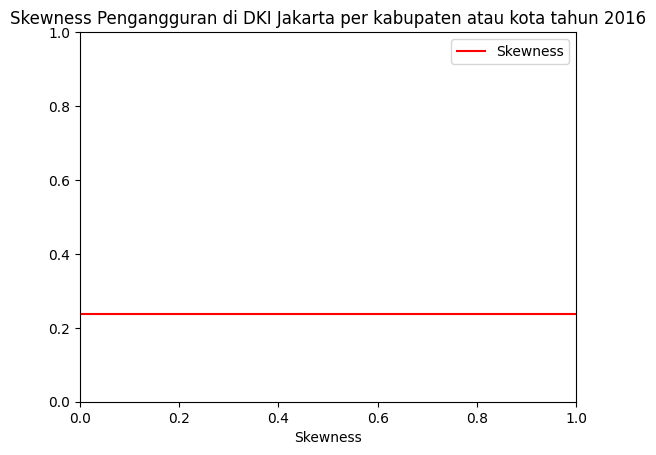


  skewness: 0.2383497013111762. 
  Nilainya >0.01, sesuai dengan ketentuan Pearson maka kurva condong ke kiri.



In [208]:
# Menghitung distribusi data

# menghitung skewness
skewness = df_kabupaten.skew()

# visualisasi skewness
plt.axhline(skewness.values, color='red', linestyle='-', label='Skewness')
plt.xlabel('Skewness')
plt.title('Skewness Pengangguran di DKI Jakarta per kabupaten atau kota tahun 2016')
plt.legend()
plt.show()

print(f'''
  skewness: {skewness.values[0]}. 
  Nilainya >0.01, sesuai dengan ketentuan Pearson maka kurva condong ke kiri.
''')

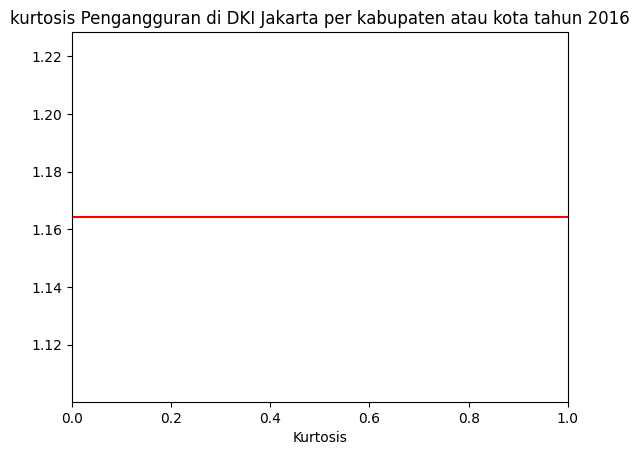


  kurtosis: 1.1642678744201804. 
  Nilainya <3 yang berarti kurtosis bersifat platykurtic.



In [197]:
# menghitung kurtosis
kurtosis = df_kabupaten.kurt()

plt.axhline(kurtosis.values, color='red', linestyle='-', label='Skewness')
plt.xlabel('Kurtosis')
plt.title('kurtosis Pengangguran di DKI Jakarta per kabupaten atau kota tahun 2016')
plt.show()

print(f'''
  kurtosis: {kurtosis.values[0]}. 
  Nilainya <3 yang berarti kurtosis bersifat platykurtic.
''')